# Task 05 - Non-parametric probability density estimation - Parzen window
## Pattern Recognition and Machine Learning

Copy and import needed files/methods from previous assignment to this directory. 
Adding path to the previous assignment is not sufficient. Upload system
requires your code to be self contained.

In [1]:
# uncomment following for interactive matplotlib
# %matplotlib notebook

from parzen import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.optimize as opt
import copy
from PIL import Image

In [2]:
p = my_parzen(np.array([1, 2, 3]), np.array([-1, 0, 2, 1.5, 0]), 1.0)
print(p)

[0.22639369 0.17268428 0.07609717]


## Load data

In [3]:
data = np.load("data_33rpz_parzen.npz", allow_pickle=True)
tst = data["tst"].item()
trn = data["trn"].item()

## Tasks, part 1
#### measurements

In [4]:
x = compute_measurement_lr_cont(trn['images'])

# splitting the trainning data into classes
idxs = np.squeeze(trn['labels'])
xA = x[idxs == 0]
xC = x[idxs == 1]

#### computing the histograms of training data

In [5]:
bins_A, centers_A = np.histogram(xA, 20)
bins_A = bins_A / (np.sum(bins_A)*(centers_A[1]-centers_A[0]))

bins_C, centers_C = np.histogram(xC, 20)
bins_C = bins_C / (np.sum(bins_C)*(centers_C[1]-centers_C[0]))

#### estimating conditional probability using Parzen window

In [6]:
x_range = np.arange(np.min(xA), np.max(xA), 100)
h = [100., 500., 1000., 2000.]

y = np.zeros([len(h), x_range.size], np.float64)
for i in range(len(h)):
    y[i,:] = my_parzen(x_range, xA, h[i])

#### visualisation

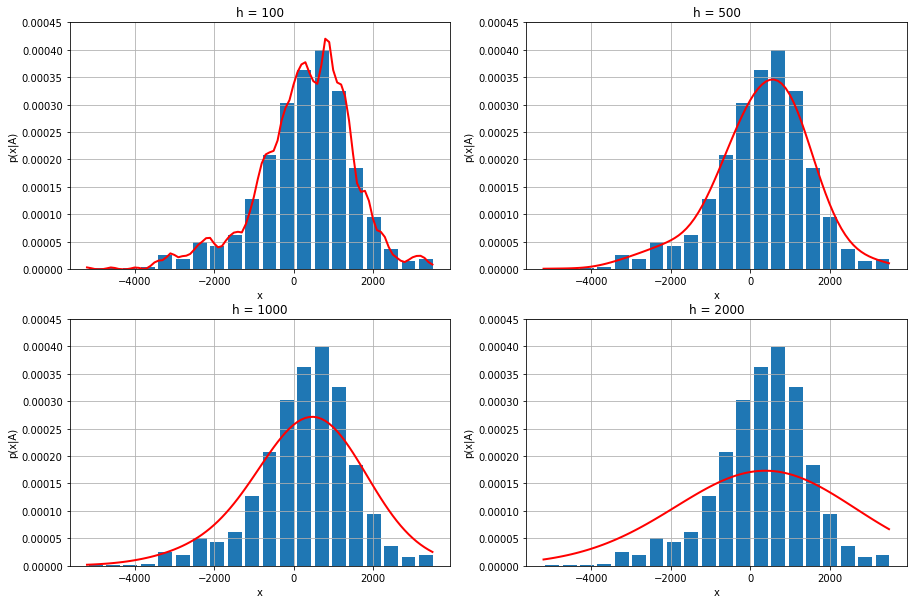

In [7]:
# plots of the estimates
plt.figure(figsize=(15,10))

for idx in range(4):
    cur_h = h[idx]
    plt.subplot(2,2,idx+1)
    width = centers_A[1]-centers_A[0]
    plt.bar(centers_A[:-1] + width/2, bins_A, width=width*0.8)
    plt.plot(x_range.T, y[idx:(idx+1),:].T, 'r', linewidth=2)
    plt.title('h = {:.0f}'.format(cur_h))
    plt.xlabel('x')
    plt.ylabel('p(x|A)')
    plt.ylim([0, 4.5e-4])
    plt.grid('on')
plt.savefig('parzen_estimates.png')

## Tasks, part 2
#### 10-fold cross-validation init

In [8]:
# h_range = np.arange(100,1000+1e-8,50)
h_range = np.linspace(100,1000,19)
num_folds = 10;

#### class A cross-validation

In [9]:
np.random.seed(42)   # needed only for upload system, to test the correctness of the code

num_data = xA.size
itrn, itst = crossval(num_data, num_folds)

raise NotImplementedError("You have to implement the rest.")
Lh = None

#### optimal value of parameter h

In [10]:
raise NotImplementedError("You have to implement the rest.")
h_bestA = None
Lh_bestA = None

#### plots of optimal h

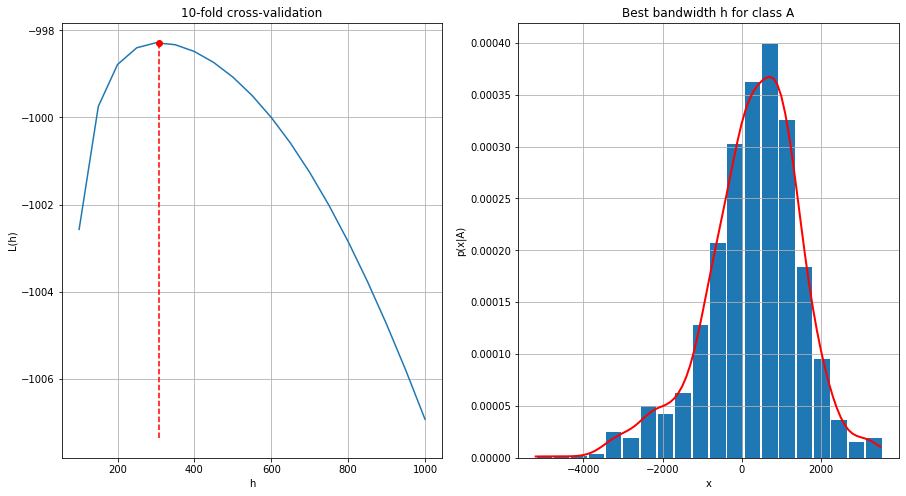

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(h_range, Lh)
plt.plot(h_bestA, Lh_bestA, 'or')
bottom, _ = plt.ylim()
plt.plot([h_bestA, h_bestA], [bottom, Lh_bestA], '--r');
plt.title('10-fold cross-validation')
plt.xlabel('h')
plt.ylabel('L(h)')
plt.grid('on')

y = my_parzen(x_range, xA, h_bestA)
plt.subplot(1,2,2)
width = centers_A[1]-centers_A[0]
plt.bar(centers_A[:-1] + width/2, bins_A, width=width*0.9)
plt.plot(x_range, y, 'r', linewidth=2)
plt.grid('on')
plt.title('Best bandwidth h for class A')
plt.xlabel('x')
plt.ylabel('p(x|A)')
plt.savefig('optimal_h_classA.png')

#### class C cross-validation

In [12]:
x_range = np.arange(np.min(xC),np.max(xC),100)

np.random.seed(42)   # needed only for upload system, to test the correctness of the code

num_data = xC.size
itrn, itst = crossval(num_data, num_folds)

Lh = np.zeros([h_range.size])
for h_iter in range(h_range.size):
    Lh[h_iter] = compute_Lh(itrn, itst, xC, float(h_range[h_iter]))

#### optimal value of parameter h

In [13]:
h_bestC = float(opt.fminbound(lambda h: -compute_Lh(itrn, itst, xC, float(h)), h_range[0], h_range[-1]))
Lh_bestC = compute_Lh(itrn, itst, xC, h_bestC)

#### plots of optimal h

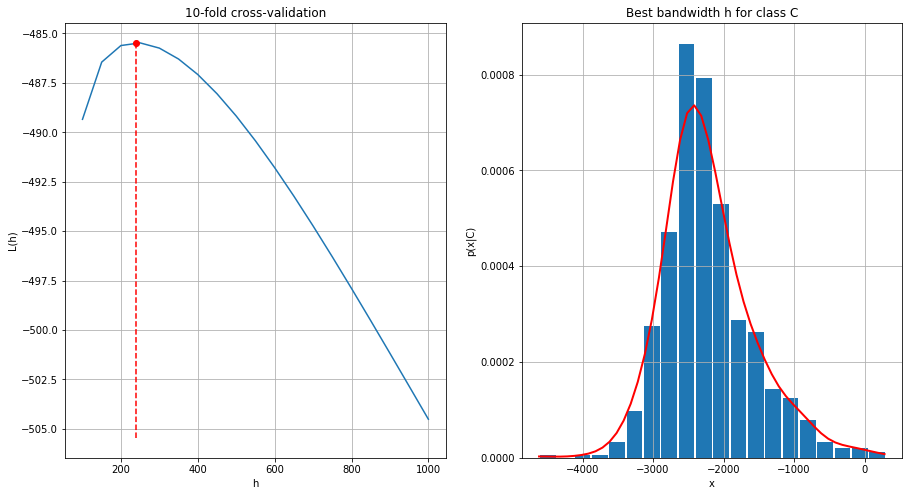

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(h_range, Lh)
plt.plot(h_bestC, Lh_bestC, 'or')
bottom, _ = plt.ylim()
plt.plot([h_bestC, h_bestC], [bottom, Lh_bestC], '--r');
plt.title('10-fold cross-validation')
plt.xlabel('h')
plt.ylabel('L(h)')
plt.grid('on')

y = my_parzen(x_range, xC, h_bestC)
plt.subplot(1,2,2)
width = centers_C[1]-centers_C[0]
plt.bar(centers_C[:-1] + width/2, bins_C, width=width*0.9)
plt.plot(x_range, y, 'r', linewidth=2)
plt.grid('on')
plt.title('Best bandwidth h for class C')
plt.xlabel('x')
plt.ylabel('p(x|C)')
plt.savefig('optimal_h_classC.png')

## Bayesian classifier

In [15]:
x_test = compute_measurement_lr_cont(tst['images'])

# computing a priori probabilities
raise NotImplementedError("You have to implement the rest.")
labels = None

#### visualisation

0.075


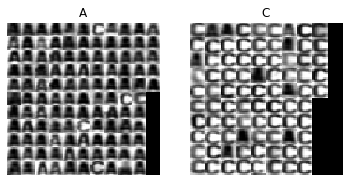

In [18]:
show_classification(tst['images'], labels, 'AC')
plt.savefig('parzen_classif.png')

# classification error
raise NotImplementedError("You have to implement the rest.")
bayes_error = None
print(bayes_error)

In [19]:
print(h_bestA, h_bestC)

307.91681045078644 238.67959502171266
